In [3]:
import pandas as pd
import numpy as np

def gbm(n_years=10, n_scenarios=1000, mu=0.07, sigma=0.15, steps_per_year=12, s_0=100.0):
    """
    Evolution of a stock price using a Geometric Brownian Montion Model
    """
    dt = 1/steps_per_year
    n_steps = int(n_years*steps_per_year)
    xi = np.random.normal(size=(n_steps, n_scenarios))
    rets = mu*dt + sigma*np.sqrt(dt)*xi
    rets = pd.DataFrame(rets)
    prices = s_0 * (1+rets).cumprod()
    return prices 


In [8]:
p = gbm(10, n_scenarios=3)

In [9]:
p.shape

(120, 3)

In [10]:
p.head()

,0,1,2
0,102.782740,108.650517,98.336647
1,108.916679,110.152142,106.796278
2,114.606481,117.709500,104.767192
3,119.849442,113.621685,117.564982
4,123.024005,114.091091,115.226638


<AxesSubplot:>

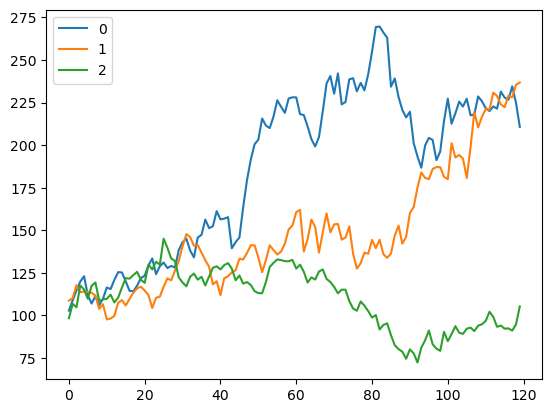

In [11]:
p.plot()

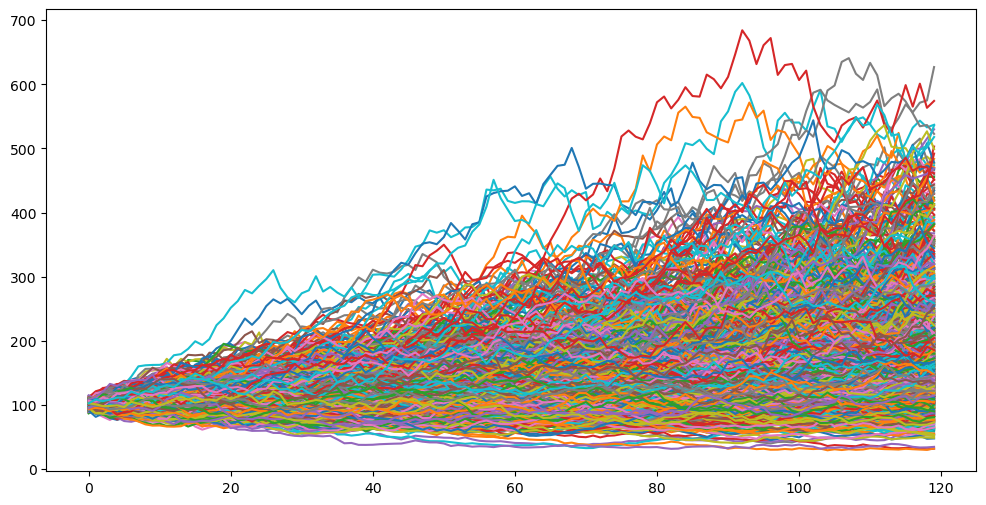

In [13]:
p = gbm(n_years=10, n_scenarios=1000).plot(figsize=(12,6), legend=False)

In [14]:
def gbm0(n_years=10, n_scenarios=1000, mu=0.07, sigma=0.15, steps_per_year=12, s_0=100.0):
    """
    Evolution of a stock price using a Geometric Brownian Montion Model
    """
    dt = 1/steps_per_year
    n_steps = int(n_years*steps_per_year)
    xi = np.random.normal(size=(n_steps, n_scenarios))
    rets = mu*dt + sigma*np.sqrt(dt)*xi
    rets = pd.DataFrame(rets)
    prices = s_0 * (1+rets).cumprod()
    return prices 

def gbm1(n_years=10, n_scenarios=1000, mu=0.07, sigma=0.15, steps_per_year=12, s_0=100.0):
    """
    Evolution of a stock price using a Geometric Brownian Montion Model
    """
    dt = 1/steps_per_year
    n_steps = int(n_years*steps_per_year)
    rets_plus_1 = np.random.normal(loc=(1+mu*dt), scale=(sigma*np.sqrt(dt)),size=(n_steps, n_scenarios))
    prices = s_0 * pd.DataFrame(rets_plus_1).cumprod()
    return prices 

In [15]:
%timeit gbm0(n_years=5, n_scenarios=1000)

3.16 ms ± 221 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [16]:
%timeit gbm1(n_years=5, n_scenarios=1000)

1.99 ms ± 33.2 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


<AxesSubplot:>

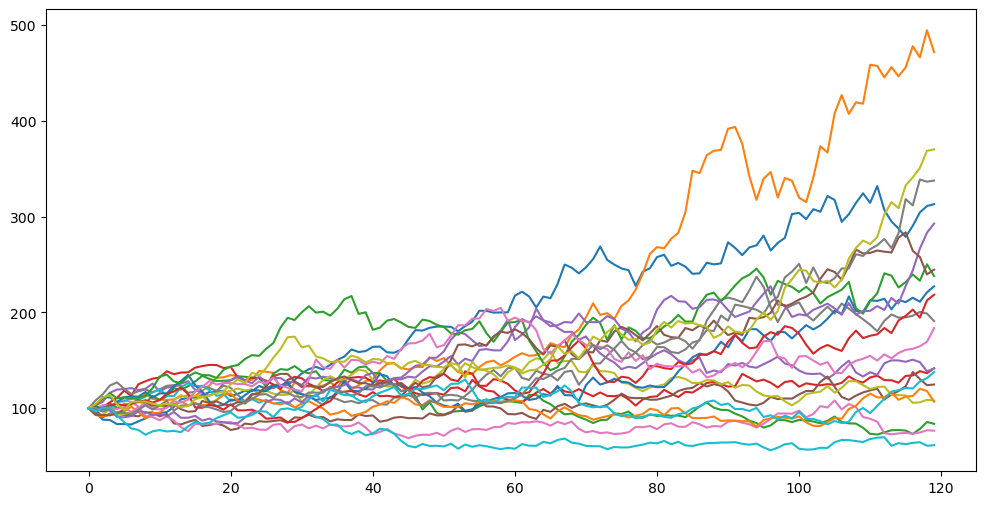

In [24]:
gbm(n_years=10, n_scenarios=20).plot(legend=False, figsize=(12,6))

In [23]:
def gbm(n_years=10, n_scenarios=1000, mu=0.07, sigma=0.15, steps_per_year=12, s_0=100.0):
    """
    Evolution of a stock price using a Geometric Brownian Montion Model
    """
    dt = 1/steps_per_year
    n_steps = int(n_years*steps_per_year)
    rets_plus_1 = np.random.normal(loc=(1+mu*dt), scale=(sigma*np.sqrt(dt)),size=(n_steps, n_scenarios))
    rets_plus_1[0] = 1
    prices = s_0 * pd.DataFrame(rets_plus_1).cumprod()
    return prices 

In [25]:
gbm(n_scenarios=10).head()

,0,1,2,3,4,5,6,7,8,9
0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
1,108.205080,101.570171,107.588074,106.364454,105.623644,95.138937,101.446280,100.443921,97.884369,100.908685
2,109.736055,99.492331,105.110608,99.124663,112.022378,99.640540,104.707219,97.301392,98.044143,96.395025
3,113.621352,102.775075,107.709378,99.599486,110.079486,94.097612,105.624306,99.587308,101.776268,102.646330
4,122.748344,104.455531,105.349197,103.507126,116.184681,92.083160,102.432232,100.025332,104.521455,99.200500
